In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Esercitazione 10

Questa esercitazione è il proseguimento della precedente. Si vuole sfruttare la possibilità di calcolo in parallelo per eseguire più di una ricerca di soluzione ottimale con l'algoritmo genetico.

## Esercizio 10.2

Per sfruttare al meglio la parallelizzazione della ricerca, non ci limitiamo a eseguirne $N$ in parallelo, ma ogni $M$ passi dell'algoritmo i diversi esecutori si scambiano il percorso migliore trovato.
Si è deciso, per la sua velocità, di usare il metodo di selezione a sottogruppi discusso nell'esercitazione 10. La dimensione della popolazione è lasciata invariata a 300 individui, e il numero di step ridotto a 500. Il numero di passi tra uno scambio e l'altro è $M = 20$.

Le probabilità di mutazione sono state aumentate, così che ogni processo esegua una più ampia ricerca nello spazio delle soluzioni:
* Scambio: 5%;
* scorrimento: 2%
* permutazione: 2%
* inversione: 12%

Inoltre i sottogruppi della ricerca hanno ora dimensione compresa tra l'8% e il 12% della dimensione della popolazione, così che sia più probabile lavorare sul percorso migliore scambiato.

Qui sotto mostriamo in funzione del passo dell'algoritmo la lunghezza del percorso migliore trovato per ogni processo.

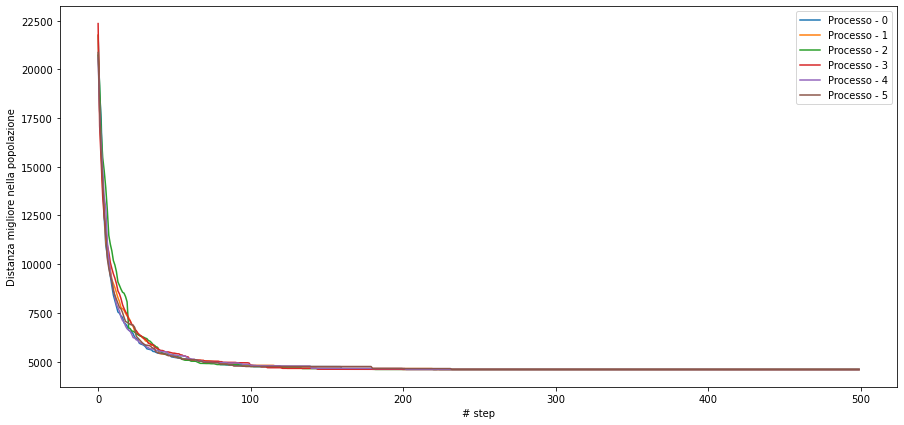

In [4]:
nnodes = 6
fit = [i for i in range(nnodes)]
step = [i for i in range(nnodes)]
for i in range(nnodes):
    step[i], fit[i] = np.loadtxt("./best_fit_out" + str(i) +".dat", usecols=(0,1), delimiter = ",",unpack='true')

plt.figure(figsize=(15,7))
for i in range(nnodes):
    plt.plot(step[i],fit[i], label = 'Processo - ' + str(i))
plt.xlabel("# step")
plt.ylabel("Distanza migliore nella popolazione")
plt.legend(loc = 'best')

Ogni processo inizializza il generatore di numeri casuali con un seme differente, così effettuano ricerche non correlate, almeno fino a quando non si scambiano il percorso migliore per la prima volta.

Le coppie che si scambiano il proprio percorso sono decise casualmente dal processo numero $0$ all'inizio del programma. Quest'informazione viene inviata cone messaggio _broadcast_ a tutti gli altri processi. Durante l'esecuzione del programma le coppie non cambiano. 

Al termine della ricerca, il processo numero $0$ raccoglie i percorsi migliori trovati dagli altri e mantiene quello con lunghezza più breve. Si tratta proprio di questo che è visibile nel grafico sotto in verde, con una lunghezza pari a $4594.84$. A sinistra, invece, è mostrato uno dei percorsi iniziali casuali.

Text(0, 0.5, 'y')

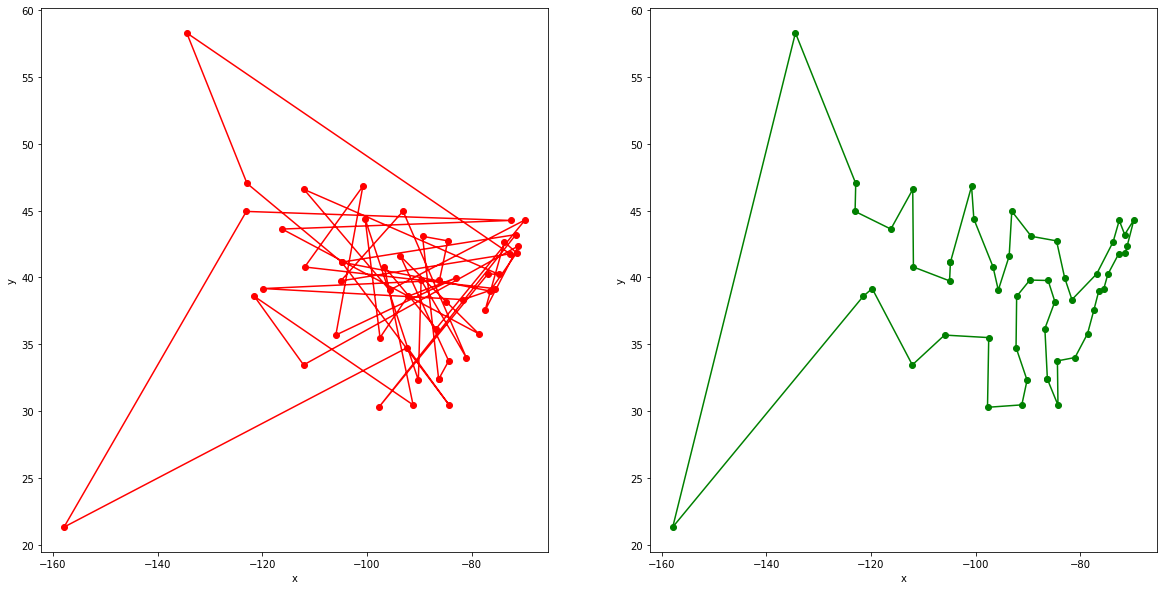

In [5]:
x, y = np.loadtxt("./Best.dat", usecols=(0,1), delimiter = ",",unpack='true')
x = np.append(x, x[0]); y = np.append(y, y[0])
xp, yp = np.loadtxt("./Best_pre.dat", usecols=(0,1), delimiter = ",", unpack ='true')
xp = np.append(xp, xp[0]); yp = np.append(yp, yp[0])

fig, ((plt_pre),(plt_post)) = plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(10)

plt_post.plot(x,y, 'go-')
plt_post.set_xlabel("x")
plt_post.set_ylabel("y")
plt_pre.plot(xp,yp, 'ro-')
plt_pre.set_xlabel("x")
plt_pre.set_ylabel("y")

Eseguiamo nuovamente il programma, ma usando un singolo processo. Produciamo gli stessi risultati di sopra.

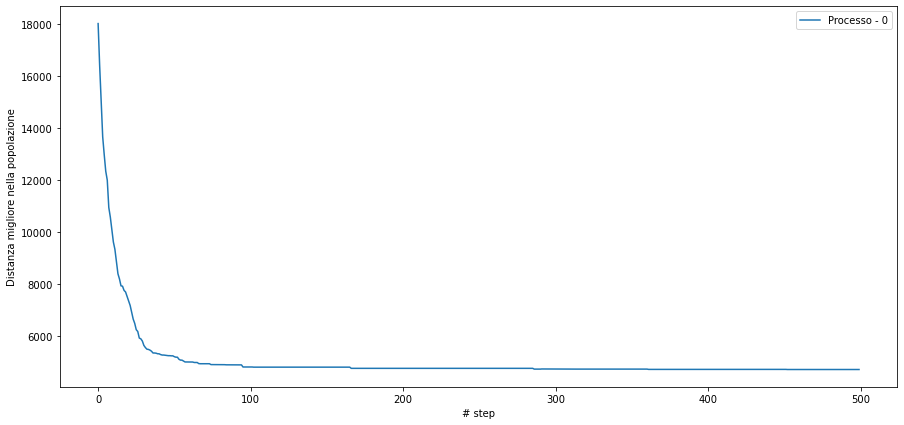

In [6]:
nnodes = 1
fit = [i for i in range(nnodes)]
step = [i for i in range(nnodes)]
for i in range(nnodes):
    step[i], fit[i] = np.loadtxt("./best_fit_out" + str(i) +".dat", usecols=(0,1), delimiter = ",",unpack='true')

plt.figure(figsize=(15,7))
for i in range(nnodes):
    plt.plot(step[i],fit[i], label = 'Processo - ' + str(i))
plt.xlabel("# step")
plt.ylabel("Distanza migliore nella popolazione")
plt.legend(loc = 'best')

Text(0, 0.5, 'y')

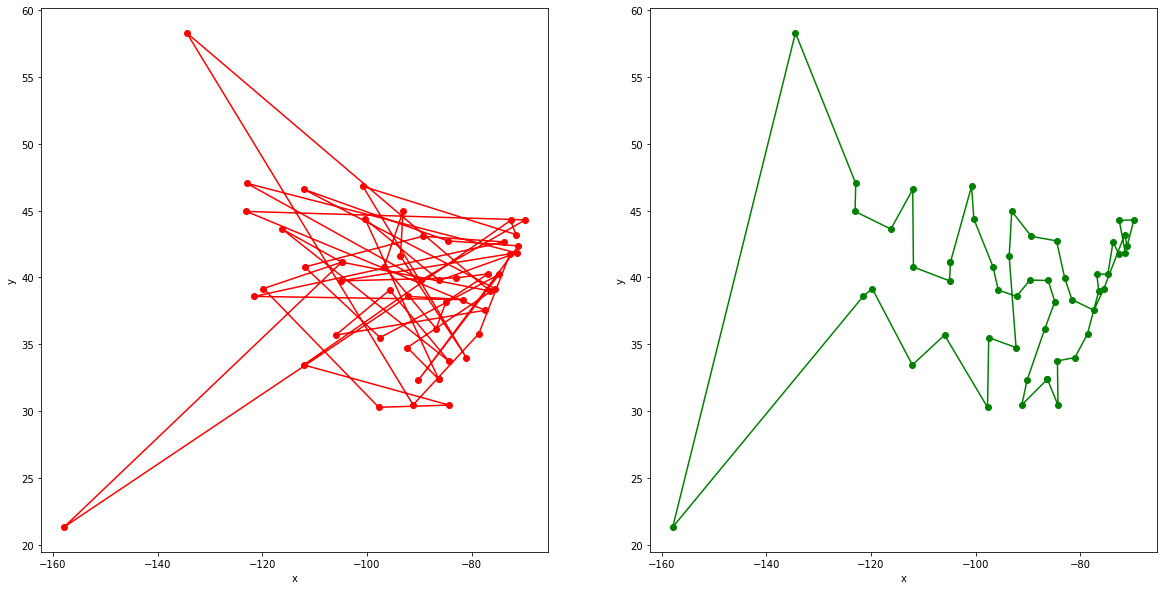

In [85]:
x, y = np.loadtxt("./Best.dat", usecols=(0,1), delimiter = ",",unpack='true')
x = np.append(x, x[0]); y = np.append(y, y[0])
xp, yp = np.loadtxt("./Best_pre.dat", usecols=(0,1), delimiter = ",", unpack ='true')
xp = np.append(xp, xp[0]); yp = np.append(yp, yp[0])

fig, ((plt_pre),(plt_post)) = plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(10)

plt_post.plot(x,y, 'go-')
plt_post.set_xlabel("x")
plt_post.set_ylabel("y")
plt_pre.plot(xp,yp, 'ro-')
plt_pre.set_xlabel("x")
plt_pre.set_ylabel("y")

La lunghezza è ora $4702.62$, maggiore di quella trovata usando il calcolo in parallelo. Ci aspettiamo in generale che un singolo processo produca in media risultati più scarsi, ma essendo l'intero algoritmo casuale, non sarebbe stato insolito trovare il percorso migliore usando un singolo processo!